In [7]:
!pip install python-bcb

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from bcb import sgs

# Configuração de estilo para os gráficos
sns.set_theme(style="whitegrid")

# Dicionário com os códigos do BC para o IC-Br
codigos_bcb = {
    'IC-Br Total': 27574,
    'Agropecuária': 27575,
    'Metais': 27576,
    'Energia': 27577
}

# Coleta dos dados (Início em 2015 para pegar um histórico relevante)
print("Coletando dados do Banco Central...")
df_commodities = sgs.get(codigos_bcb, start='2015-01-01')

# Exibe as 5 primeiras linhas para confirmar se funcionou
df_commodities.head()

Coletando dados do Banco Central...


,IC-Br Total,Agropecuária,Metais,Energia
Date,,,,
2015-01-01,137.64,156.59,151.62,56.35
2015-02-01,143.96,162.47,157.86,63.56
2015-03-01,155.69,175.44,171.11,69.15
2015-04-01,151.96,171.26,166.85,67.29
2015-05-01,153.70,171.90,169.74,71.53


In [9]:
df_commodities.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 131 entries, 2015-01-01 to 2025-11-01
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   IC-Br Total   131 non-null    float64
 1   Agropecuária  131 non-null    float64
 2   Metais        131 non-null    float64
 3   Energia       131 non-null    float64
dtypes: float64(4)
memory usage: 5.1 KB


In [10]:
# Estatística descritiva básica (Média, min, max)
df_commodities.describe()

,IC-Br Total,Agropecuária,Metais,Energia
count,131.000000,131.000000,131.000000,131.000000
mean,277.455954,294.871374,336.931450,141.910840
std,109.846347,115.516164,137.758185,66.567967
min,137.640000,156.590000,151.620000,56.350000
25%,173.805000,189.325000,214.050000,84.840000
50%,225.520000,249.400000,294.000000,119.660000
75%,390.890000,401.300000,461.025000,186.710000
max,482.570000,537.720000,600.720000,330.550000


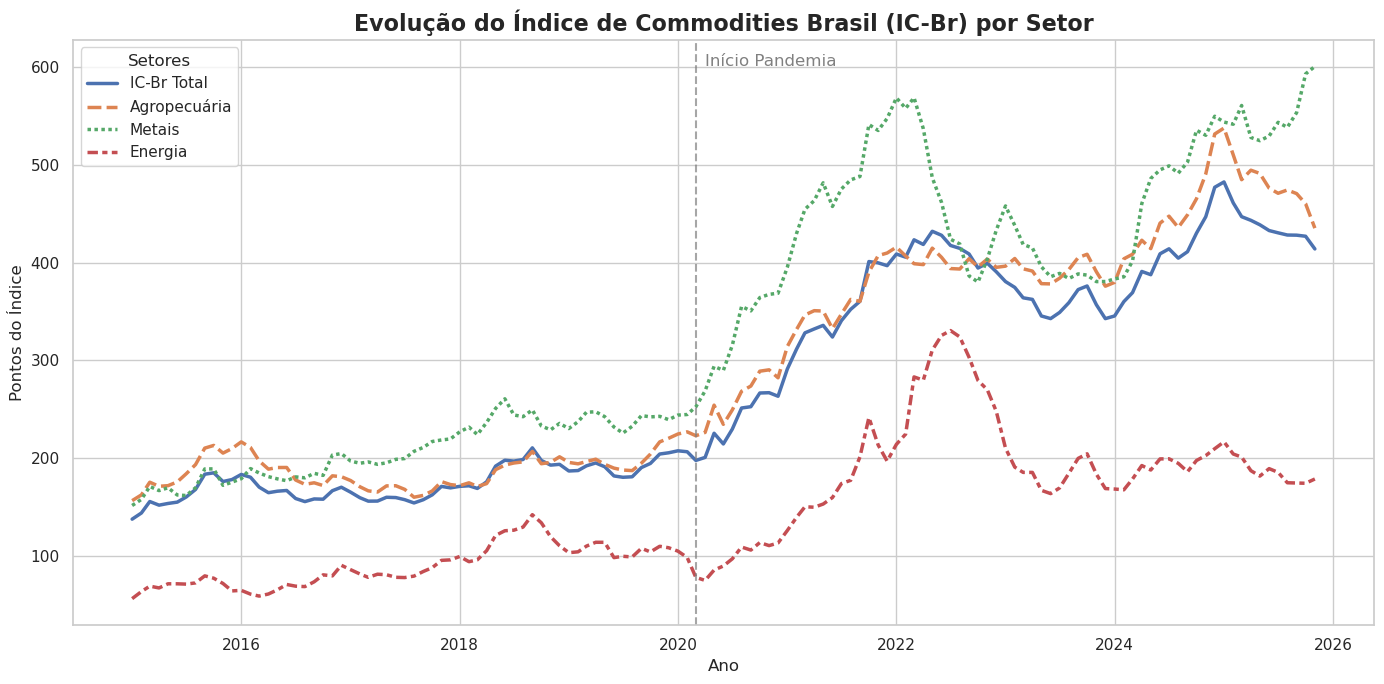

In [11]:
# Definindo o tamanho da figura para ficar bem visível
plt.figure(figsize=(14, 7))

# Criando o gráfico de linhas com os dados do DataFrame
# O Seaborn entende automaticamente que o índice (Data) é o eixo X
sns.lineplot(data=df_commodities, linewidth=2.5)

# Personalização do Gráfico
plt.title('Evolução do Índice de Commodities Brasil (IC-Br) por Setor', fontsize=16, fontweight='bold')
plt.ylabel('Pontos do Índice', fontsize=12)
plt.xlabel('Ano', fontsize=12)
plt.legend(title='Setores', title_fontsize='12', fontsize='11', loc='upper left')

# Adicionando uma linha vertical pontilhada para marcar o início da pandemia (março/2020)
# Isso mostra contexto econômico na sua análise
plt.axvline(pd.to_datetime('2020-03-01'), color='gray', linestyle='--', alpha=0.7)
plt.text(pd.to_datetime('2020-04-01'), df_commodities.max().max(), 'Início Pandemia', color='gray')

plt.tight_layout()
plt.show()

In [14]:
# 1. Baixar a série do Dólar (Código 1 = Taxa de Câmbio Livre - Venda - Diário)
print("Baixando dados do Dólar...")
dolar_raw = sgs.get({'Dolar': 1}, start='2015-12-31')

Baixando dados do Dólar...


In [15]:
# 2. Transformação (Resampling)
# O Dólar é diário, o IC-Br é mensal. Vamos pegar a média mensal do dólar.
# 'MS' significa 'Month Start' (início do mês), para alinhar com as datas do IC-Br
dolar_mensal = dolar_raw.resample('MS').mean()

In [16]:
# 3. Merge (Juntando as tabelas)
# Usamos o .join() que alinha automaticamente pelo índice (Data)
df_analise = df_commodities.join(dolar_mensal).dropna()

In [17]:
# Visualizar as primeiras linhas da tabela unificada
df_analise.head()

,IC-Br Total,Agropecuária,Metais,Energia,Dolar
Date,,,,,
2015-12-01,178.15,209.86,175.48,64.25,3.904800
2016-01-01,183.39,216.68,179.01,64.82,4.052350
2016-02-01,180.54,210.97,189.38,60.98,3.973742
2016-03-01,170.41,197.22,184.86,58.96,3.703918
2016-04-01,164.72,188.81,181.15,61.10,3.565845


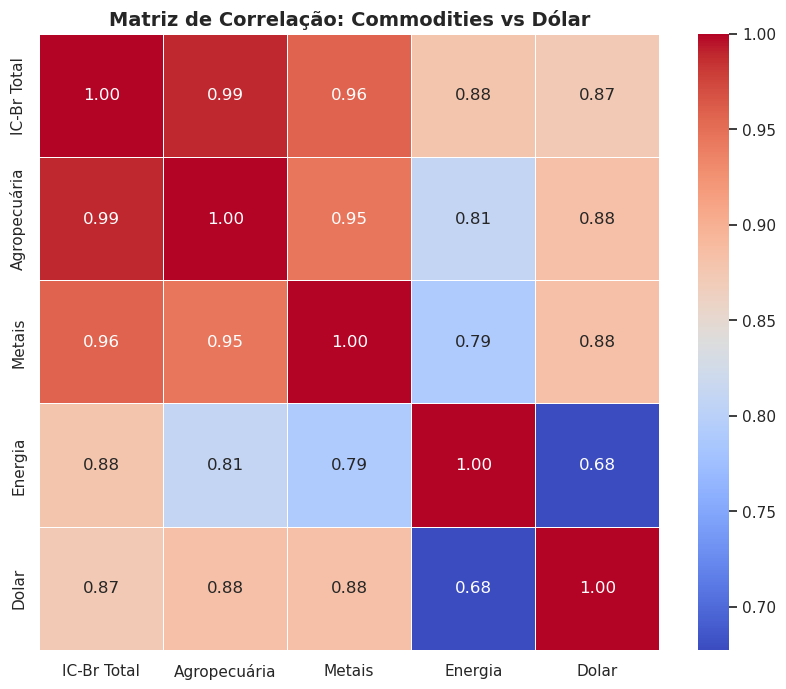

In [18]:
# Calcular a matriz de correlação (Pearson)
correlacao = df_analise.corr()

# Plotar o Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlacao, 
            annot=True,       # Escreve o número no quadrado
            cmap='coolwarm',  # Cores: Azul (negativo) a Vermelho (positivo)
            fmt=".2f",        # 2 casas decimais
            linewidths=.5)

plt.title('Matriz de Correlação: Commodities vs Dólar', fontsize=14, fontweight='bold')
plt.show()

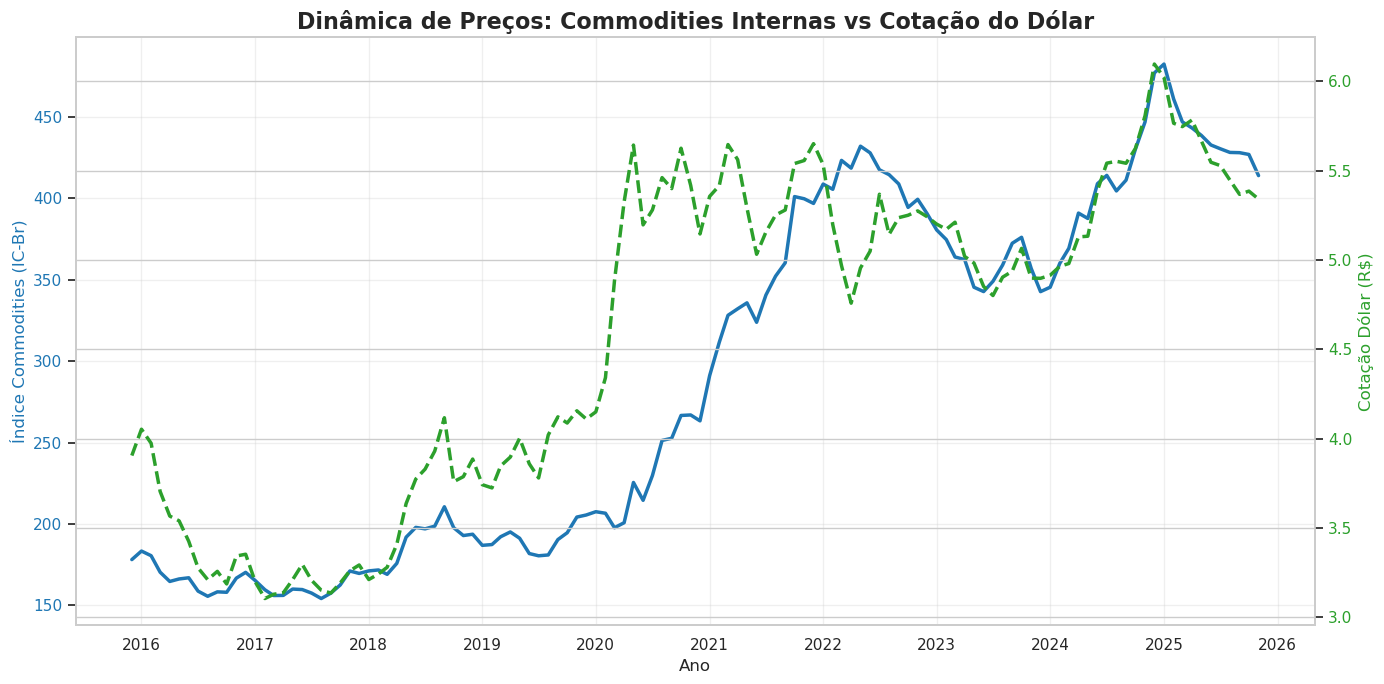

In [19]:
import matplotlib.pyplot as plt

# Criando a figura e o primeiro eixo (Esquerda)
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plotando o IC-Br no eixo da esquerda (Azul)
color_1 = 'tab:blue'
ax1.set_xlabel('Ano', fontsize=12)
ax1.set_ylabel('Índice Commodities (IC-Br)', color=color_1, fontsize=12)
ax1.plot(df_analise.index, df_analise['IC-Br Total'], color=color_1, linewidth=2.5, label='IC-Br Total')
ax1.tick_params(axis='y', labelcolor=color_1)
ax1.grid(True, alpha=0.3) # Grid suave apenas para o eixo principal

# Criando o segundo eixo (Direita) que compartilha o mesmo X
ax2 = ax1.twinx()

# Plotando o Dólar no eixo da direita (Verde)
color_2 = 'tab:green'
ax2.set_ylabel('Cotação Dólar (R$)', color=color_2, fontsize=12)
ax2.plot(df_analise.index, df_analise['Dolar'], color=color_2, linewidth=2.5, linestyle='--', label='Dólar (R$)')
ax2.tick_params(axis='y', labelcolor=color_2)
# Removemos o grid do segundo eixo para não poluir o visual com linhas cruzadas

# Título e ajustes finais
plt.title('Dinâmica de Preços: Commodities Internas vs Cotação do Dólar', fontsize=16, fontweight='bold')
fig.tight_layout()  # Ajusta as margens para não cortar os textos
plt.show()

In [20]:
!pip install plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 1.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 426.4/426.4 kB 1.2 MB/s eta 0:00:0000:0100:01


In [21]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio

# Força o Plotly a renderizar como um iframe (funciona em 99% dos casos no Jupyter Lab)
pio.renderers.default = "iframe"

# 1. Criar a estrutura de subplots com eixo Y secundário
fig = make_subplots(specs=[[{"secondary_y": True}]])

# 2. Adicionar a linha do IC-Br (Eixo Esquerdo)
fig.add_trace(
    go.Scatter(
        x=df_analise.index, 
        y=df_analise['IC-Br Total'], 
        name="IC-Br Total",
        line=dict(color='blue', width=2)
    ),
    secondary_y=False, # Define que usa o eixo da esquerda
)

# 3. Adicionar a linha do Dólar (Eixo Direito)
fig.add_trace(
    go.Scatter(
        x=df_analise.index, 
        y=df_analise['Dolar'], 
        name="Dólar (R$)",
        line=dict(color='green', width=2, dash='dot') # Linha pontilhada para diferenciar
    ),
    secondary_y=True, # Define que usa o eixo da direita
)

# 4. Personalização do Layout (A "maquiagem" do gráfico)
fig.update_layout(
    title_text="<b>Análise Interativa: Commodities vs Dólar</b>",
    hovermode="x unified", # Mostra os dois valores ao mesmo tempo ao passar o mouse
    legend=dict(orientation="h", y=1.1, x=0), # Legenda horizontal no topo
    template="plotly_white" # Fundo branco limpo
)

# 5. Títulos dos Eixos
fig.update_yaxes(title_text="<b>Índice Commodities</b>", color="blue", secondary_y=False)
fig.update_yaxes(title_text="<b>Dólar (R$)</b>", color="green", secondary_y=True)

# Exibir o gráfico
fig.show()

In [22]:
# Salva o gráfico como um arquivo HTML independente
fig.write_html("grafico_commodities_dolar.html")

print("Arquivo 'grafico_commodities_dolar.html' salvo com sucesso na sua pasta!")

Arquivo 'grafico_commodities_dolar.html' salvo com sucesso na sua pasta!
